In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "C:/Users/apoor/CNN/input/asl_alphabet_train"

CATEGORIES = ["A", "B", "C", "D","del", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "nothing", "O", "P", "Q", "R", "S", "space", "T", "U", "V", "W", "X", "Y", "Z"]

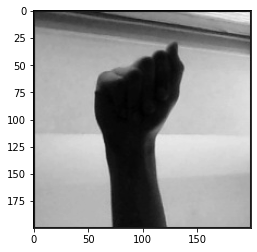

In [2]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break

In [3]:
print(img_array)

[[ 30  28  31 ...  28  32  26]
 [ 29  28  32 ...  31  26  34]
 [ 27  31  47 ... 186 182  26]
 ...
 [ 32  25 142 ... 137 139  27]
 [ 28  31 138 ... 140 131  32]
 [ 28  30  28 ...  29  32  27]]


In [4]:
print(img_array.shape)

(200, 200)


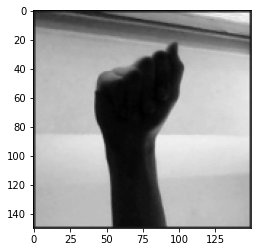

In [5]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 3070/3070 [00:03<00:00, 934.80it/s]

88815


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

28
17
28
4
11
4
19
8
21
20


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 28]
   [ 29]
   [ 28]
   ...
   [ 27]
   [ 30]
   [ 28]]

  [[ 29]
   [ 44]
   [ 62]
   ...
   [ 62]
   [ 80]
   [ 37]]

  [[ 30]
   [ 61]
   [ 96]
   ...
   [128]
   [137]
   [ 49]]

  ...

  [[ 28]
   [118]
   [209]
   ...
   [124]
   [121]
   [ 46]]

  [[ 29]
   [119]
   [210]
   ...
   [123]
   [123]
   [ 43]]

  [[ 29]
   [ 44]
   [ 59]
   ...
   [ 44]
   [ 44]
   [ 31]]]]


In [10]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("train.pickle","wb")
pickle.dump(training_data, pickle_out)
pickle_out.close()

In [11]:
DATADIR = "C:/Users/apoor/CNN/input/asl_alphabet_test"

CATEGORIES = ["A", "B", "C", "D","del", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "nothing", "O", "P", "Q", "R", "S", "space", "T", "U", "V", "W", "X", "Y", "Z"]
IMG_SIZE = 50

testing_data = []

def create_testing_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array1 = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array1 = cv2.resize(img_array1, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                testing_data.append([new_array1, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_testing_data()

print(len(testing_data))

100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 319.98it/s]

899


In [12]:
import random

random.shuffle(testing_data)

In [13]:
for sample in testing_data[:10]:
    print(sample[1])

21
8
0
2
12
6
17
1
3
1


In [14]:
X_test = []
y_test = []

for features,label in testing_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[135]
   [180]
   [187]
   ...
   [223]
   [221]
   [218]]

  [[182]
   [189]
   [187]
   ...
   [217]
   [215]
   [210]]

  [[179]
   [183]
   [185]
   ...
   [205]
   [205]
   [216]]

  ...

  [[184]
   [183]
   [173]
   ...
   [197]
   [200]
   [184]]

  [[184]
   [182]
   [182]
   ...
   [194]
   [193]
   [202]]

  [[182]
   [184]
   [181]
   ...
   [187]
   [185]
   [213]]]]


In [15]:
pickle_out = open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

pickle_out = open("test.pickle","wb")
pickle.dump(testing_data, pickle_out)
pickle_out.close()